In [140]:
#import libraries
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
import plotly.express as px
import folium
import tweepy
import re
import nltk
%matplotlib inline
import string
from geopy.geocoders import Nominatim
from matplotlib import style
import plotly.graph_objects as go
import plotly.express as pye


In [141]:
#read and view the CSV tweets file
joe_biden=pd.read_csv(r"C:\Users\Mbetini\Downloads\CIS7030_S1_21_Task2_Data.csv")
print(joe_biden)

           created_at      tweet_id  \
0    15/10/2020 00:00  1.320000e+18   
1    15/10/2020 00:00  1.320000e+18   
2    15/10/2020 00:00  1.320000e+18   
3    15/10/2020 00:00  1.320000e+18   
4    15/10/2020 00:00  1.320000e+18   
..                ...           ...   
495  15/10/2020 00:29  1.320000e+18   
496  15/10/2020 00:29  1.320000e+18   
497  15/10/2020 00:29  1.320000e+18   
498  15/10/2020 00:29  1.320000e+18   
499  15/10/2020 00:29  1.320000e+18   

                                                 tweet  likes  retweet_count  \
0    #Elecciones2020 | En #Florida: #JoeBiden dice ...      0              0   
1    #HunterBiden #HunterBidenEmails #JoeBiden #Joe...      0              0   
2    @IslandGirlPRV @BradBeauregardJ @MeidasTouch T...      0              0   
3    @chrislongview Watching and setting dvr. Let‚Ä...      0              0   
4    #censorship #HunterBiden #Biden #BidenEmails #...      1              0   
..                                                 

In [142]:
#Data cleaning
def clean_the_tweets(txt):
    txt = re.sub(r'@[A-Za-z0-9_]+', '', txt) # Remove @mentions and symbols
    txt = re.sub(r'#', '', txt)# Remove hashtags#
    txt = re.sub(r'RT : ', '', txt)# Remove retweets:
    txt = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', txt)# Remove urls 
    return txt

joe_biden.head(500)




,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,15/10/2020 00:00,1.320000e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0,0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,üåê Noticias de inter√©s para latinos de la c...,...,1860,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,21/10/2020 00:00
1,15/10/2020 00:00,1.320000e+18,#HunterBiden #HunterBidenEmails #JoeBiden #Joe...,0,0,Twitter for iPad,8.099044e+08,Cheri A. üá∫üá∏,Biloximeemaw,"Locked and loaded Meemaw. Love God, my family ...",...,6628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:00.5
2,15/10/2020 00:00,1.320000e+18,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,0,0,Twitter Web App,3.494182e+09,Flag Waver,Flag_Wavers,NaN,...,1536,Golden Valley Arizona,46.304036,-109.171431,NaN,United States of America,North America,Montana,MT,00:01.0
3,15/10/2020 00:00,1.320000e+18,@chrislongview Watching and setting dvr. Let‚Ä...,0,0,Twitter for iPhone,8.240000e+17,Michelle Ferg,MichelleFerg4,NaN,...,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:01.6
4,15/10/2020 00:00,1.320000e+18,#censorship #HunterBiden #Biden #BidenEmails #...,1,0,Twitter Web App,1.030000e+18,the Gold State,theegoldstate,A Silicon Valley #independent #News #Media #St...,...,390,"California, USA",36.701463,-118.755997,NaN,United States of America,North America,California,CA,00:02.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,15/10/2020 00:29,1.320000e+18,Must watchüëáüèª#Biden family corruption. ht...,35,32,Twitter for iPhone,3.031552e+07,Susan Ward,Susaninlaguna,Amazon Bestselling Author. Believes in family ...,...,26012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04:22.5
496,15/10/2020 00:29,1.320000e+18,FACTS: @JoeBiden has been accused of sexual as...,16,10,Twitter Web App,8.256080e+08,Justin T. Haskins,JustinTHaskins,Christian. Conservative Millennial. Editorial ...,...,18940,"The South, USA",36.638392,127.696119,NaN,South Korea,Asia,NaN,NaN,04:23.1
497,15/10/2020 00:29,1.320000e+18,"Hunter #Biden won a Nobel Peace Prize, R's try...",0,0,Twitter Web App,9.470000e+17,Nicholas Sones,NickSones,Fight Back Harder! Publisher of @GLRepublic,...,2183,"Silver Spring Township, PA",41.299538,-74.848779,Dingman Township,United States of America,North America,Pennsylvania,PA,04:23.6
498,15/10/2020 00:29,1.320000e+18,This is utter bullshit. This was a news articl...,4,0,Twitter for iPhone,7.749858e+08,kaytee,TeamDaniMBB14,Names Kaytee. 1st Official fan account for the...,...,294,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04:24.1


In [143]:
#Replace missing values with mean and drops null values
joe_biden_mean =joe_biden.fillna(joe_biden.mean())
joe_biden_tweets =joe_biden_mean.dropna(subset= ['tweet_id', 'tweet', 'likes', 'retweet_count', 'source', 'user_id', 'user_name','user_screen_name', 'user_description', 'user_followers_count', 'user_location', 'lat', 'long', 'city', 'country', 'continent', 'state', 'state_code'])

In [144]:
#View the cleaned data
joe_biden_tweets.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
6,15/10/2020 00:00,1.320000e+18,"In 2020, #NYPost is being #censorship #CENSORE...",0,0,Twitter for iPhone,1.994033e+07,Change Illinois | Biden will increase taxes by...,changeillinois,"Illinois, home of Lincoln and Reagan, used to ...",...,1397,"Chicago, Illinois",41.875562,-87.624421,Chicago,United States of America,North America,Illinois,IL,00:03.1
17,15/10/2020 00:01,1.320000e+18,"Comments on this? ""Do Democrats Understand how...",0,0,Twitter Web App,1.016593e+08,John Ubaldi,ubaldireports,Just Facts... No Fiction on domestic and globa...,...,83,"Tampa, Florida",27.947759,-82.458444,Tampa,United States of America,North America,Florida,FL,00:08.8
25,15/10/2020 00:01,1.320000e+18,@RealJamesWoods #BidenCrimeFamily #JoeBiden #H...,0,0,Twitter for Android,1.300000e+18,Sam KEYS,SamKEYS65729181,Patriot,...,29,"Los Angeles, CA",34.053691,-118.242766,Los Angeles,United States of America,North America,California,CA,00:12.9
28,15/10/2020 00:02,1.320000e+18,#Trump #Obama #Clinton #Biden\n\n#ManWomanPers...,0,0,Twitter for iPhone,1.321631e+08,Saroop Rooprai FIA,roshannnikhil,üå∂G20 YEA UK DELEGATE üå∂ACTUARY üå∂ CORPO...,...,841,"London, UK",51.507322,-0.127647,London,United Kingdom,Europe,England,ENG,00:14.5
29,15/10/2020 00:02,1.320000e+18,Come on @ABC PLEASE DO THE RIGHT THING. Move t...,0,0,Twitter Web App,3.343224e+08,Elphygirl,Elphygirl,"#imwithher - forever. Mother, Wife. Daughter. ...",...,166,"New York, NY",40.712728,-74.006015,New York,United States of America,North America,New York,NY,00:15.0


In [145]:
#Defines function to get Polarity in tweets
def getTextPolarity(txt):
    return TextBlob(txt).sentiment.polarity

In [146]:
#Defines function to get subjectivity in tweets
def getTextSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity

In [147]:
#eliminates warninngs from my functions in 17 &18 below
pd.options.mode.chained_assignment = None

In [148]:
#Applies polarity function  to data
joe_biden_tweets['polarity'] = joe_biden_tweets['tweet'].apply(getTextPolarity)

In [149]:
#Applies polarity function to data
joe_biden_tweets['subjectivity'] = joe_biden_tweets['tweet'].apply(getTextSubjectivity)

In [150]:
#samples of tweets after imposing fumction
joe_biden_tweets=joe_biden_tweets.sample(n=76)
joe_biden_tweets

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,lat,long,city,country,continent,state,state_code,collected_at,polarity,subjectivity
420,15/10/2020 00:25,1.320000e+18,"Without #FakeSocialmedia and #FakeNewsMedia, #...",0,0,Twitter for Android,1.860407e+08,Dejavu,Dejidodo,True Gunner!!!!!! #Arsenal üá≥üá¨üá®üá¶,...,43.653482,-79.383935,Toronto,Canada,North America,Ontario,ON,03:42.7,-0.5125,0.700
283,15/10/2020 00:17,1.320000e+18,#HunterBiden #JoeBiden https://t.co/hBSoa3dqh2,0,0,Twitter for iPhone,8.110000e+17,Rodger Stone,SSEditorials,Rodger Stone's kicking libtard snowflake ass s...,...,32.753177,-97.332746,Fort Worth,United States of America,North America,Texas,TX,02:29.7,0.0000,0.000
338,15/10/2020 00:20,1.320000e+18,@JoeBiden @KamalaHarris hi! What will you do a...,0,0,Twitter for iPhone,7.630000e+17,Yancy,yancy_the_bull,I believe that everyone should do what they lo...,...,40.712728,-74.006015,New York,United States of America,North America,New York,NY,02:59.7,0.2500,0.200
493,15/10/2020 00:29,1.320000e+18,@kylegriffin1 What the part where #JoeBiden di...,0,0,Twitter for iPhone,5.333638e+08,Got Work,joefryoux,Its just me. conservative. Proud to love our C...,...,29.949932,-90.070116,New Orleans,United States of America,North America,Louisiana,LA,04:21.5,0.0000,0.000
53,15/10/2020 00:03,1.320000e+18,This is from the same night I met the cast of ...,0,0,Twitter for iPhone,5.581804e+08,ü¶© Hannah for Biden/Harrisü¶©,CarlsonHannahM,Band Director ‚Ä¢ BME Furman University ‚Ä¢ MM...,...,39.768333,-86.158350,Indianapolis,United States of America,North America,Indiana,IN,00:29.0,0.0000,0.125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,15/10/2020 00:17,1.320000e+18,It looks like #Twitter is in full spin mode de...,1,0,Twitter Web App,2.623956e+07,Dennis Furlan ‚Ñπ,dennisfurlan,"Freelance writer, communications specialist, c...",...,43.324892,-79.796684,Burlington,Canada,North America,Ontario,ON,02:27.6,0.3500,0.550
131,15/10/2020 00:08,1.320000e+18,@stephbarlow2 @JoshSchwerin @soledadobrien Dis...,0,0,Twitter for iPhone,8.682016e+07,Russell Imrie,tweedyBard,takes on world & sec events UC NDN research an...,...,38.890396,-77.084159,Arlington,United States of America,North America,Virginia,VA,01:09.9,0.1000,0.525
34,15/10/2020 00:02,1.320000e+18,#realDonaldTrump addresses #JoeBiden and #Hunt...,0,1,Twitter for iPhone,3.381891e+09,Truth Hurts,TheTruthSekr,You are only a victim of yourself and your poo...,...,44.977300,-93.265469,Minneapolis,United States of America,North America,Minnesota,MN,00:17.6,0.5000,0.500
379,15/10/2020 00:22,1.320000e+18,Hunter Biden‚Äôs alleged laptop: an explainer ...,1,0,Twitter Web App,1.180585e+08,tim schreier,timschreiernyc,"Personal Bookmarks in #Solutions #Media, #Acc...",...,40.712728,-74.006015,New York,United States of America,North America,New York,NY,03:20.4,-0.1000,0.100


In [151]:
#Map of polarity 
map1=folium.Map(location=[joe_biden_tweets.lat.mean(), joe_biden_tweets.long.mean()], zoom_start=5)
for index, location_info in joe_biden_tweets.iterrows():
    folium.Marker([location_info["lat"],
                  location_info["long"]],
                 popup = location_info["polarity"]).add_to(map1)
map1

In [152]:
#Map of subjectivity 
map2=folium.Map(location=[joe_biden_tweets.lat.mean(), joe_biden_tweets.long.mean()], zoom_start=5)
for i in range(0,len(joe_biden_tweets)):
   folium.Marker(
      location=[joe_biden_tweets.iloc[i]['lat'], joe_biden_tweets.iloc[i]['long']],
      popup=joe_biden_tweets.iloc[i]['subjectivity'],
   ).add_to(map2)
map2

In [153]:
#filter columns to aid plotting of histogram
biden_tweets=joe_biden_tweets[['tweet', 'polarity', 'subjectivity']]
biden_tweets

,tweet,polarity,subjectivity
420,"Without #FakeSocialmedia and #FakeNewsMedia, #...",-0.5125,0.700
283,#HunterBiden #JoeBiden https://t.co/hBSoa3dqh2,0.0000,0.000
338,@JoeBiden @KamalaHarris hi! What will you do a...,0.2500,0.200
493,@kylegriffin1 What the part where #JoeBiden di...,0.0000,0.000
53,This is from the same night I met the cast of ...,0.0000,0.125
...,...,...,...
279,It looks like #Twitter is in full spin mode de...,0.3500,0.550
131,@stephbarlow2 @JoshSchwerin @soledadobrien Dis...,0.1000,0.525
34,#realDonaldTrump addresses #JoeBiden and #Hunt...,0.5000,0.500
379,Hunter Biden‚Äôs alleged laptop: an explainer ...,-0.1000,0.100


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared



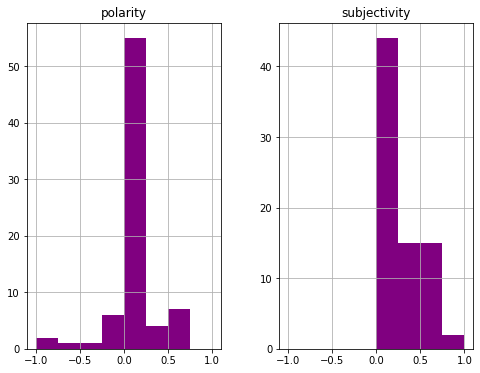

In [154]:
#Histogram of polarity and subjectivity
fig, ax = plt.subplots(figsize=(8, 6))
biden_tweets.hist(bins=[-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1],
                      ax=ax, color="purple")
plt.show()